## 1. Baca data sumber

In [1]:
# file hasil convert ke csv sebaiknya  koma-separated, trus titik misal 12.75

Nama_kota = 'Bristol'
import numpy as np
import pandas as pd
datasetku = pd.read_csv('Selected_files/Bristol_tem2.csv', sep=";")

#dataset_train = pd.read_csv("Selected_files/hourly-temp15.csv", sep=",")
#dat = pd.read_csv('../5.Liguaria/LiguFinal/hasil/hourly-liguria15.csv', sep=",")
datasetku.isnull().sum()


date      0
temp    112
dtype: int64

## 2. Algoritma Scanner

In [2]:
#############################################################################
# Temperature data pre-processing, to find the location of the missing values
# The goals are: 
# 1. To find the missing values' location, 
# 2. To identify how many batch of the missing values, and 
# 3. To identify how many row of each batch of the missing values
#
# Input : The pre-processed temperature data in .csv form.
# Output : 
# 1. Missing values' location
# 2. Number of the missing values' batch
# 3. Number of the rows of each batch
#
# we can use this output information to decide what kind of filling to use
# for batch that only contain 1,2 or 3 mv, we applied linear interpolation
# for batch contain longer row mv, we applied machine learning technique
#############################################################################

import numpy as np
import pandas as pd
import time

# Path to .csv file location
dat = datasetku
#dat =pd.read_csv("Selected_files/hourly-temp15.csv", sep=",")
#dat = pd.read_csv('Liguaria-Limky-02.csv', sep=",")
mv =  dat['temp'].isnull().sum()
print('Number of missing values:',mv)
print('Please wait,')
print('Looking for missing value location...')
## Filtering the dataframe, select only mv row
# buffer format [row_number, values, hourly_form]

start_time = time.time()

#buffer for mv
buffer = list()

#helper variables
ff, gg, ind = 0, 0, 0
seq, idx = [], []

# Part 1 : buffer preparation
for i in range (0,8760):
    for ii in range (0, 24): # ini for iterate jam
        cc = pd.isnull(dat["temp"])[i]
        if (cc == True):
            if (i%24 == ii): # brarti jam 0, dst
                dd = ( i, dat['temp'][i],ii)
                ee = list(dd)
                buffer.append(ee)
                
#part 2 : loop for Missing values Eyes
for n in range (0, mv):
    if (buffer[n][0] - buffer[n-1][0] == 1):
        ff +=1
    else:
        seq.append(ff)
        idx.append(buffer[n][0])
        ff = 1 
        gg +=1
        ind +=1
seq.append(ff)

elapsed_time = time.time() - start_time
print()
print('Found')
print('--------------------------')
print('Number of batch          :', len(seq)-1)
print('Number of data each batch:', seq[1:])
print('Start from (Row Number)  :',idx)
print()
print ("Time elapsed: {} seconds".format(elapsed_time))

Number of missing values: 112
Please wait,
Looking for missing value location...

Found
--------------------------
Number of batch          : 10
Number of data each batch: [8, 20, 8, 3, 10, 12, 8, 16, 5, 22]
Start from (Row Number)  : [1120, 1964, 2727, 3526, 4211, 5030, 5909, 6832, 7643, 8344]

Time elapsed: 20.173503875732422 seconds


In [ ]:
# kopi hasil di atas, jadi seperti ini:

mvp_br    = [1120, 1964, 2727, 3526, 4211, 5030, 5909, 6832, 7643, 8344] 
mvn_br    = [8,    20,   8,    3,    10,   12,   8,    16,   5,    22]

# akan fi pakai di program utama algoritma filler


## 3. Plot Lokasi MV 

In [3]:
# Cari nilai MVP untuk garis warba biru
mvp = 2727
mvn = 8
#datasetku[mvp-1:mvp+mvn+1]

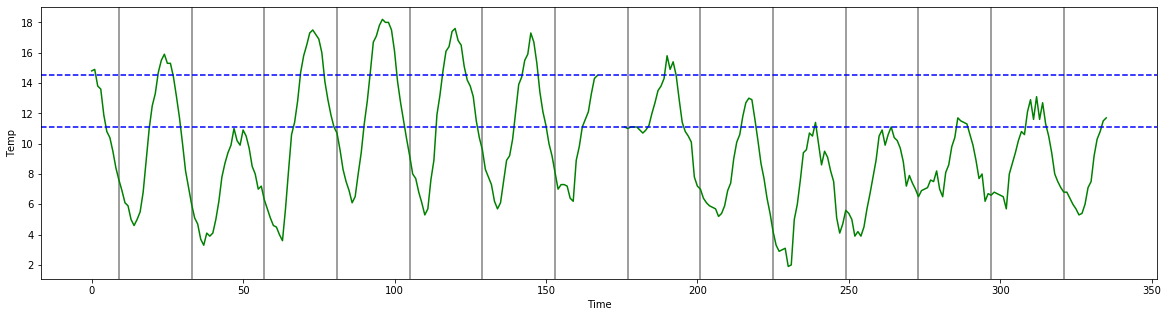

In [4]:
## Mulai Plot

y1 = datasetku['temp'][mvp-1]
y2 = datasetku['temp'][mvp+mvn]

perjam = list()

for i in range (0,8760):
    dda = ( i, datasetku['temp'][i])
    dff = list(dda)
    perjam.append(dff)

import matplotlib.pyplot as plt
%matplotlib inline

rantang = 14 # rentang hari 
mulai = 7    # di mulai x hari sejak mvp


plt.figure(figsize=(20,5))
zz = []
for i in range(0, 24*rantang):   
    ss=perjam[mvp-(24*mulai)+i][1]       # undur 7 hari sebelum
    xxx = perjam[(mvp-(24*21))+i][0]  # jika 0 maka indexnya, 1 nilainya
    
    zz.append(ss)
    if (xxx%24 ==0):
        plt.axvline(x=i, color = 'grey')
#print(zz)
plt.xlabel("Time")
plt.ylabel("Temp")
plt.plot(zz, color = 'green')
plt.axhline(y=y1, color = 'blue',linestyle='dashed')
plt.axhline(y=y2,  color = 'blue',linestyle='dashed')
plt.savefig(Nama_kota+' MVP_'+str(mvp)+'.png', dpi=500, facecolor='w', edgecolor='w',
                orientation='portrait', papertype='legal', format=None,
                transparent=False, bbox_inches='tight', pad_inches=0.5)
plt.show()

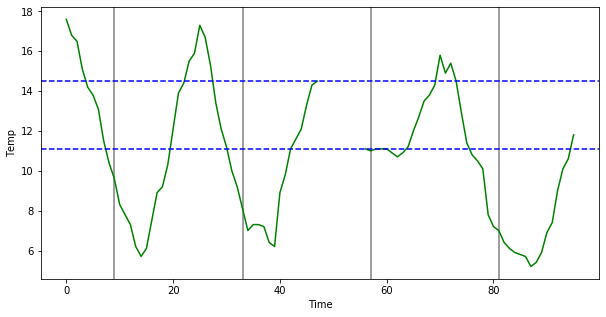

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

rantang = 4 # rentang hari 
mulai = 2 # di mulai x hari sejak mvp

plt.figure(figsize=(10,5))
zz = []
for i in range(0, 24*rantang):   
    ss=perjam[mvp-(24*mulai)+i][1]       # undur 7 hari sebelum
    xxx = perjam[(mvp-(24*21))+i][0]  # jika 0 maka indexnya, 1 nilainya
    
    zz.append(ss)
    if (xxx%24 ==0):
        plt.axvline(x=i, color = 'grey')
#print(zz)
plt.xlabel("Time")
plt.ylabel("Temp")
plt.plot(zz, color = 'green')
plt.axhline(y=y1, color = 'blue',linestyle='dashed')
plt.axhline(y=y2,  color = 'blue',linestyle='dashed')
plt.savefig(Nama_kota+' MVP_'+str(mvp)+'_zoom.png', dpi=500, facecolor='w', edgecolor='w',
                orientation='portrait', papertype='legal', format=None,
                transparent=False, bbox_inches='tight', pad_inches=0.5)
plt.show()

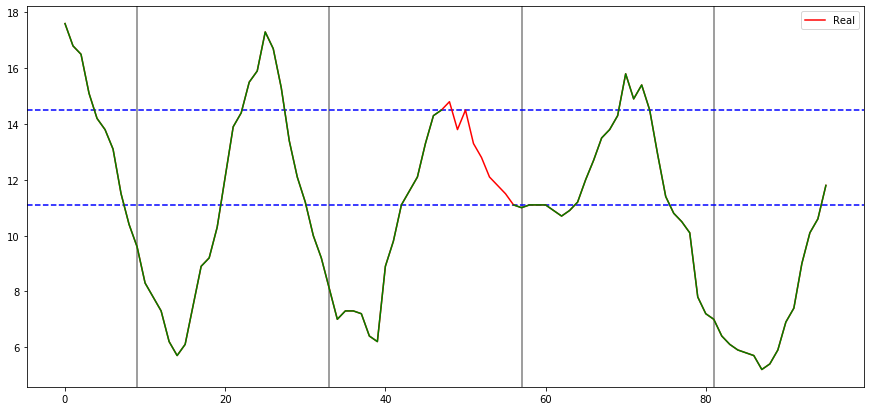

In [6]:
## Data asli
dataset_asli = pd.read_csv('Selected_files/Bristol_temp_asli.csv', sep=";")
perjam_asli = list()
for i in range (0,8760):
    dda = ( i, dataset_asli['temp'][i])   # dataset asli di ganti disini
    dff = list(dda)
    perjam_asli.append(dff) 

plt.figure(figsize=(15,7))
zz_as = []
for i in range(0, 24*rantang):   
    ss  = perjam_asli[mvp-(24*mulai)+i][1]       # undur 7 hari sebelum
    xxx = perjam_asli[(mvp-(24*21))+i][0]        # jika 0 maka indexnya, 1 nilainya
    zz_as.append(ss)
    if (xxx%24 ==0):                             # untuk per 24 jam, garis vertikal biru
        plt.axvline(x=i, color = 'grey')

#plt.plot(zzp, color = 'red', linestyle='dashed', label="Prediction" )
plt.axhline(y=y1,  color = 'blue',linestyle='dashed')
plt.axhline(y=y2,  color = 'blue',linestyle='dashed')
plt.plot(zz_as,    color = 'red', label="Real")
plt.plot(zz,       color = 'green')
plt.legend()

plt.savefig(Nama_kota+' MVP_'+str(mvp)+'_zoom_real.png', dpi=500, facecolor='w', edgecolor='w',
                orientation='portrait', papertype='legal', format=None,
                transparent=False, bbox_inches='tight', pad_inches=0.5)
plt.show()

## 4. Algoritma Filler 

In [ ]:
## file ini di kembangkan berdasarkan file RNN-Copy3-master
# update terkahir 29 september 2020

## referensi
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/
# https://keras.io/api/layers/recurrent_layers/lstm/
#================================================================#

#Number of data each batch: [3, 8, 2, 3, 14]
#Start from (Row Number)  : [537, 2851, 4146, 7078, 8341]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

%time
start_time = time.time()

# Path to .csv file location
dataset_train = datasetku

ds_trainn = [360, 720]
timestep = [24, 48, 72]
#epochku_ = [125, 125, 125, 125, 125]

# setting hyperparameter n other parameters
struktur = '3HL-br'
optimiz  = 'RMSProp'                # RMSProp, adam
lossku   = 'mean_absolute_error'    # 'mean_absolute_error', mean_squared_error
activaku = 'tanh'                   # sigmoid
ds_train = 360#ds_trainn[j]                   # train dataset selama 360 jam = 15 hari, 720 jam = 30 hari
batchku  = 72                       # batch tetap 72
epochku  = 400                      # epok
L_units  = 24#timestep[i]           # bactch, mengikuti timestep
loopback = L_units                  #timestep[i]  # window method, t-1...t-24, mengikuti timestep

# setting missing value proccess
mvp = 6832  #   [1120, 1964, 2727, 3526, 4211, 5030, 5909, 6832, 7643, 8344] 
mvn = 16     #  [8,    20,   8,    3,    10,   12,   8,    16,   5,    22]

lfd = ds_train   
jkj = loopback    # jumlah jam kolom, loop back, window method
training_set = dataset_train.iloc[mvp-lfd:mvp, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 72 timesteps and 1 output
X_train = []
y_train = []

for i in range(jkj, lfd):  ## jadi geser sesuai panjang 72 dan 720
    X_train.append(training_set_scaled[i-jkj:i, 0])
    y_train.append(training_set_scaled[i, 0])
    if i <= jkj:
        print(X_train)
        print(y_train)
        print()
print('struktur X_train dan y_train: ')
print('============================= ')
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape),print(y_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## susun struktur jaringan
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = L_units, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = L_units, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 24))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1, activation=activaku))

# Pilih settingan 
regressor.compile(optimizer = optimiz, loss = lossku)

# proses pembelajaran
vb = regressor.fit(X_train, y_train, epochs = epochku, batch_size = batchku)


#===================================================#
## loop sepanjang missing value untuk filling
#mvn = 8 #  jumlah missing value untuk di prediksi

inpr = dataset_train['temp'][mvp-jkj:mvp].values   # mvp adalah titik missing value pertama

for i in range (mvn):
    inp = inpr.reshape(-1,1)
    inp = sc.transform(inp)
    X1_test = np.array(np.transpose(inp))
    X1_test = np.reshape(X1_test, (X1_test.shape[0], X1_test.shape[1], 1))
    len(X1_test[0]), len(X1_test)

    ## predict with model
    predicted_temp1 = regressor.predict(X1_test)
    ## rescale
    predicted_temp1 = sc.inverse_transform(predicted_temp1)
    ## insert new value to the end of array
    inpb = np.append(inpr, float("{:.3f}".format(predicted_temp1[0][0])))
    ## trim first index, to fit 72 again
    inpbb = np.delete(inpb, 0)
    inpr = inpbb

## extract for error calc.

sh = mvn
dsh= dataset_train['temp'][mvp-sh-jkj-24:mvp-24].values
inpku = dsh[:jkj]

for i in range (sh):
    inprs = inpku.reshape(-1,1)
    inprs = sc.transform(inprs)
    X1s_test = np.array(np.transpose(inprs))
    X1s_test = np.reshape(X1s_test, (X1s_test.shape[0], X1s_test.shape[1], 1))
    len(X1s_test[0]), len(X1s_test)

    ## predict with model
    predicted_temp1s = regressor.predict(X1s_test)
    ## rescale
    predicted_temp1s = sc.inverse_transform(predicted_temp1s)
    ## insert new value to the end of array
    inpbs = np.append(inpku, predicted_temp1s[0][0])
    ## trim first index, to fit 72 again
    inpbbs = np.delete(inpbs, 0)
    inpku = inpbbs

## calculating performances metric
def rmse(targets, predictions):
    return np.sqrt(((targets - predictions) ** 2).mean())

def mae(targets, predictions):
    return ((abs(targets - predictions)).mean())

def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y)**2)
    ss_res = sum((Y - Y_pred)**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

prediksi = inpbbs[-sh:]
target = dsh[-sh:]
drmse = rmse(prediksi, target)
dmae  = mae(prediksi, target)
dr2   = r2(target, prediksi)


print('RMSE : ', drmse)
print('R**2 : ', dr2)
print('MAE : ', dmae)

# Append-adds at last 
file1 = open("Nrekapmae_"+str(mvp)+".txt","a")#append mode 
# https://pyformat.info
LL = "{}, {}, {}, {}, {}, {}, {}, {:2.3f}, {:2.3f}, {:2.3f}, {} \n". format (struktur, optimiz, lossku, activaku, ds_train, loopback, epochku, drmse, dmae, dr2, inpr[-9:])
file1.write(LL) 
file1.close() 


# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

rantang = 4 # rentang hari 
mulai = 2   # di mulai x hari sejak mvp
yyp = inpr[-mvn:]

#persiapan untuk plot missing value 
perjam = list()

for i in range (0,8760):
    dda = ( i, dataset_train['temp'][i])   # dataset asli di ganti disini
    dff = list(dda)
    perjam.append(dff)

# generate range untuk plot
zz = []
for i in range(0, 24*rantang):   
    ss = perjam[mvp-(24*mulai)+i][1]       # undur 7 hari sebelum
    zz.append(ss)   

# isi prediksi missing data
zzp = zz.copy()
k = 0
for i in range (0,len(zzp)):
    cc = pd.isnull(zzp)[i]
    if (cc == True):
        zzp[i]=yyp[k]
        k += 1    

## Data asli
dataset_asli = pd.read_csv('Selected_files/Bristol_temp_asli.csv', sep=";")
perjam_asli = list()
for i in range (0,8760):
    dda = ( i, dataset_asli['temp'][i])   # dataset asli di ganti disini
    dff = list(dda)
    perjam_asli.append(dff) 


plt.figure(figsize=(10,5))
zz_as = []
for i in range(0, 24*rantang):   
    ss  = perjam_asli[mvp-(24*mulai)+i][1]       # undur 7 hari sebelum
    xxx = perjam_asli[(mvp-(24*21))+i][0]        # jika 0 maka indexnya, 1 nilainya
    zz_as.append(ss)
    if (xxx%24 ==0):                             # untuk per 24 jam, garis vertikal biru
        plt.axvline(x=i, color = 'blue')

#nama figure
LL2= "{}, {}, {}, {}, \n ds_Train:{}, TS:{}, Epoch:{}, RMSE:{:2.3f}, MAE:{:2.3f}, RR:{:2.3f} \n". format (struktur, optimiz, lossku, activaku, ds_train, loopback, epochku, drmse, dmae, dr2)
plt.title(LL2)
plt.plot(zzp,   color = 'red'  , label="Prediction",  linestyle='dashed' )
plt.plot(zz_as, color = 'green', label="Real")
plt.legend() 

#nama file
LL3= "{}_{}_{}_{}_{}_{}_{}_{:2.3f}_{:2.3f}_{:2.3f}". format (struktur, ds_train, loopback, epochku, optimiz, lossku, activaku,  drmse, dmae, dr2)
plt.savefig('LSTM_'+LL3+'.png', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='legal', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.5)

plt.show()
    
elapsed_time = time.time() - start_time
print ("Time elapsed: {} seconds".format(elapsed_time))